In [1]:
import bioframe

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import time

In [5]:
from multiprocessing import Pool

In [6]:
bioframe.SCHEMAS['bed']

['chrom', 'start', 'end', 'name', 'score', 'strand']

In [7]:
df_chr1 = bioframe.read_table('promoters_by_chromosome/hg38_fp_chr1.bed', schema='bed')

In [8]:
df_chr1

,chrom,start,end,name,score,strand
0,chr1,11118,12118,ENST00000456328.2_up_750_chr1_11119_f,0,+
1,chr1,11259,12259,ENST00000450305.2_up_750_chr1_11260_f,0,+
2,chr1,29570,30570,ENST00000488147.1_up_750_chr1_29571_r,0,-
3,chr1,17436,18436,ENST00000619216.1_up_750_chr1_17437_r,0,-
4,chr1,28803,29803,ENST00000473358.1_up_750_chr1_28804_f,0,+
...,...,...,...,...,...,...
10784,chr1,248858413,248859413,ENST00000417047.1_up_750_chr1_248858414_f,0,+
10785,chr1,248905445,248906445,ENST00000355360.8_up_750_chr1_248905446_f,0,+
10786,chr1,248905484,248906484,ENST00000329291.6_up_750_chr1_248905485_f,0,+
10787,chr1,248912795,248913795,ENST00000363625.1_up_750_chr1_248912796_r,0,-


In [15]:
bb_file = 'JASPAR2022_hg38.bb'
bioframe.read_bigbed(bb_file, "chr1", start=11118, end=12118)

,chrom,start,end,name,score,strand,TFName
0,chr1,11109,11120,MA0748.2,308,+,YY2
1,chr1,11109,11121,MA1961.1,336,+,PATZ1
2,chr1,11110,11119,MA0671.1,225,-,NFIX
3,chr1,11110,11121,MA0741.1,326,-,KLF16
4,chr1,11110,11121,MA1513.1,313,-,KLF15
...,...,...,...,...,...,...,...
3671,chr1,12113,12120,MA0848.1,253,-,FOXO4
3672,chr1,12113,12120,MA0849.1,259,-,FOXO6
3673,chr1,12113,12120,MA0850.1,227,-,FOXP3
3674,chr1,12115,12125,MA1638.1,238,-,HAND2


In [45]:
bioframe.read_chromsizes(bb_file)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 0: invalid continuation byte

In [10]:
bb_url = 'http://expdata.cmmt.ubc.ca/JASPAR/downloads/UCSC_tracks/2022/JASPAR2022_hg38.bb'
bioframe.read_bigbed(bb_url, "chr1", start=11118, end=12118)

,chrom,start,end,name,score,strand,TFName
0,chr1,11109,11120,MA0748.2,308,+,YY2
1,chr1,11109,11121,MA1961.1,336,+,PATZ1
2,chr1,11110,11119,MA0671.1,225,-,NFIX
3,chr1,11110,11121,MA0741.1,326,-,KLF16
4,chr1,11110,11121,MA1513.1,313,-,KLF15
...,...,...,...,...,...,...,...
3671,chr1,12113,12120,MA0848.1,253,-,FOXO4
3672,chr1,12113,12120,MA0849.1,259,-,FOXO6
3673,chr1,12113,12120,MA0850.1,227,-,FOXP3
3674,chr1,12115,12125,MA1638.1,238,-,HAND2


In [11]:
df_chr1 = bioframe.read_table('promoters_by_chromosome/hg38_fp_chr1.bed', schema='bed')
df_chr1['name'] = df_chr1['name'].apply(lambda x: x.split('.')[0])
df_chr1.drop(columns=['score', 'strand'], inplace=True)
df_chr1.set_index('name', inplace=True)

In [12]:
df_chr1.head()

,chrom,start,end
name,,,
ENST00000456328,chr1,11118,12118
ENST00000450305,chr1,11259,12259
ENST00000488147,chr1,29570,30570
ENST00000619216,chr1,17436,18436
ENST00000473358,chr1,28803,29803


In [17]:
tf_list = np.loadtxt('filtered_tfs_original.txt', dtype=str)

In [18]:
tf_list = set(tf_list)

In [15]:
test_motifs = bioframe.read_bigbed(bb_file, "chr1", start=11118, end=12118)

In [16]:
test_motifs.head()

,chrom,start,end,name,score,strand,TFName
0,chr1,11109,11120,MA0748.2,308,+,YY2
1,chr1,11109,11121,MA1961.1,336,+,PATZ1
2,chr1,11110,11119,MA0671.1,225,-,NFIX
3,chr1,11110,11121,MA0741.1,326,-,KLF16
4,chr1,11110,11121,MA1513.1,313,-,KLF15


In [17]:
max_scores = test_motifs[test_motifs['TFName'].isin(tf_list)].groupby('TFName')[['score', 'name']].max()

In [18]:
max_scores[max_scores['score'] >= 400]

,score,name
TFName,,
ASCL1,458,MA1631.1
ATOH7,471,MA1468.1
Ascl2,424,MA0816.1
BCL6,454,MA0463.2
BHLHA15,407,MA0607.2
...,...,...
ZNF682,501,MA1599.1
ZNF768,430,MA1731.1
Zfp335,402,MA2002.1


In [19]:
start_time = time.time()
edges = pd.DataFrame()
for transcript in df_chr1.index[:100]:
    start,end = df_chr1.loc[transcript][['start', 'end']]
    motifs = bioframe.read_bigbed(bb_file, "chr1", start=start, end=end)
    max_scores = motifs[motifs['TFName'].isin(tf_list)].groupby('TFName')[['score', 'name']].max()
    max_scores = max_scores[max_scores['score'] >= 400]
    max_scores.reset_index(inplace=True)
    max_scores['transcript'] = transcript
    edges = pd.concat((edges, max_scores))
elapsed = time.time() - start_time
print ('Elapsed time: {:n} m {:.2f} s'.format(elapsed // 60, elapsed % 60))

Elapsed time: 0 m 4.75 s


In [20]:
edges

,TFName,score,name,transcript
0,ASCL1,458,MA1631.1,ENST00000456328
1,ATOH7,471,MA1468.1,ENST00000456328
2,Ascl2,424,MA0816.1,ENST00000456328
3,BCL6,454,MA0463.2,ENST00000456328
4,BHLHA15,407,MA0607.2,ENST00000456328
...,...,...,...,...
136,ZNF701,413,MA1987.1,ENST00000379409
137,ZNF708,433,MA1730.1,ENST00000379409
138,ZNF740,434,MA0753.2,ENST00000379409
139,ZNF768,517,MA1731.1,ENST00000379409


In [21]:
df_chr21 = bioframe.read_table('promoters_by_chromosome/hg38_fp_chr21.bed', schema='bed')
df_chr21['name'] = df_chr21['name'].apply(lambda x: x.split('.')[0])
df_chr21.drop(columns=['score', 'strand'], inplace=True)
df_chr21.set_index('name', inplace=True)

In [38]:
start_time = time.time()
edges_21 = pd.DataFrame()
for transcript in df_chr21.index:
    start,end = df_chr21.loc[transcript][['start', 'end']]
    motifs = bioframe.read_bigbed(bb_file, "chr21", start=start, end=end)
    max_scores = motifs[motifs['TFName'].isin(tf_list)].groupby('TFName')[['score', 'name']].max()
    max_scores = max_scores[max_scores['score'] >= 400]
    max_scores.reset_index(inplace=True)
    max_scores['transcript'] = transcript
    edges_21 = pd.concat((edges_21, max_scores), ignore_index=True, copy=False)
elapsed = time.time() - start_time
print ('Elapsed time: {:n} m {:.2f} s'.format(elapsed // 60, elapsed % 60))

Elapsed time: 2 m 3.52 s


In [39]:
edges_21

,TFName,score,name,transcript
0,ASCL1,448,MA1631.1,ENST00000624081
1,ATF6,411,MA1466.1,ENST00000624081
2,Bcl11B,598,MA1989.1,ENST00000624081
3,CDX2,450,MA0465.2,ENST00000624081
4,CTCF,520,MA0139.1,ENST00000624081
...,...,...,...,...
227482,ZNF384,415,MA1125.1,ENST00000427757
227483,ZNF416,511,MA1979.1,ENST00000427757
227484,ZNF418,590,MA1980.1,ENST00000427757
227485,ZNF701,484,MA1987.1,ENST00000427757


In [24]:
# start_time = time.time()
# edges_21 = pd.DataFrame()
# for transcript in df_chr21.index[:100]:
#     start,end = df_chr21.loc[transcript][['start', 'end']]
#     motifs = bioframe.read_bigbed(bb_url, "chr21", start=start, end=end)
#     max_scores = motifs[motifs['TFName'].isin(tf_list)].groupby('TFName')[['score', 'name']].max()
#     max_scores = max_scores[max_scores['score'] >= 400]
#     max_scores.reset_index(inplace=True)
#     max_scores['transcript'] = transcript
#     edges_21 = pd.concat((edges_21, max_scores))
# elapsed = time.time() - start_time
# print ('Elapsed time: {:n} m {:.2f} s'.format(elapsed // 60, elapsed % 60))

In [13]:
def filter_edges(bb_ref, bed_df, chrom, start_ind, final_ind, score_threshold=400):
    df = pd.DataFrame()
    for transcript in bed_df.index[start_ind:final_ind]:
        start,end = bed_df.loc[transcript][['start', 'end']]
        motifs = bioframe.read_bigbed(bb_ref, chrom, start=start, end=end)
        max_scores = motifs[motifs['TFName'].isin(tf_list)].groupby('TFName')[['score', 'name']].max()
        max_scores = max_scores[max_scores['score'] >= score_threshold]
        max_scores.reset_index(inplace=True)
        max_scores['transcript'] = transcript
        df = pd.concat((df, max_scores), ignore_index=True, copy=False)
    return df

In [33]:
len(df_chr21)

1590

In [44]:
start_time = time.time()

edges_21_alt = filter_edges(bb_file, df_chr21, 'chr21', 0, len(df_chr21.index))

elapsed = time.time() - start_time
print ('Elapsed time: {:n} m {:.2f} s'.format(elapsed // 60, elapsed % 60))

Elapsed time: 2 m 1.80 s


In [45]:
edges_21_alt

,TFName,score,name,transcript
0,ASCL1,448,MA1631.1,ENST00000624081
1,ATF6,411,MA1466.1,ENST00000624081
2,Bcl11B,598,MA1989.1,ENST00000624081
3,CDX2,450,MA0465.2,ENST00000624081
4,CTCF,520,MA0139.1,ENST00000624081
...,...,...,...,...
227482,ZNF384,415,MA1125.1,ENST00000427757
227483,ZNF416,511,MA1979.1,ENST00000427757
227484,ZNF418,590,MA1980.1,ENST00000427757
227485,ZNF701,484,MA1987.1,ENST00000427757


In [125]:
start_time = time.time()

n_processes = 16
chunk_size = 10

chunk_divisions = [i for i in range(0,len(df_chr21),chunk_size)]

p = Pool(n_processes)

def temp_func(x):
    return filter_edges(bb_file, df_chr21, 'chr21', x, x+chunk_size)

# time.sleep(0.1)

result = p.map_async(temp_func, chunk_divisions, chunksize=n_processes)
edges_21_list = result.get()

elapsed = time.time() - start_time
print ('Elapsed time: {:n} m {:.2f} s'.format(elapsed // 60, elapsed % 60))

Elapsed time: 0 m 10.20 s


In [129]:
(len(df_chr1) / 16) ** 0.5

25.96752779915716

In [130]:
start_time = time.time()

n_processes = 16
chunk_size = 26

chunk_divisions = [i for i in range(0,len(df_chr1),chunk_size)]

p = Pool(n_processes)

def temp_func(x):
    return filter_edges(bb_file, df_chr1, 'chr1', x, x+chunk_size)

time.sleep(0.1)

result = p.map_async(temp_func, chunk_divisions, chunksize=n_processes)
edges_1_list = result.get()

elapsed = time.time() - start_time
print ('Elapsed time: {:n} m {:.2f} s'.format(elapsed // 60, elapsed % 60))

Elapsed time: 0 m 24.93 s


In [132]:
pd.concat(edges_1_list, ignore_index=True)

,TFName,score,name,transcript
0,ASCL1,448,MA1631.1,ENST00000624081
1,ATF6,411,MA1466.1,ENST00000624081
2,Bcl11B,598,MA1989.1,ENST00000624081
3,CDX2,450,MA0465.2,ENST00000624081
4,CTCF,520,MA0139.1,ENST00000624081
...,...,...,...,...
227482,ZNF384,415,MA1125.1,ENST00000427757
227483,ZNF416,511,MA1979.1,ENST00000427757
227484,ZNF418,590,MA1980.1,ENST00000427757
227485,ZNF701,484,MA1987.1,ENST00000427757


In [126]:
pd.concat(edges_21_list, ignore_index=True)

,TFName,score,name,transcript
0,ASCL1,448,MA1631.1,ENST00000624081
1,ATF6,411,MA1466.1,ENST00000624081
2,Bcl11B,598,MA1989.1,ENST00000624081
3,CDX2,450,MA0465.2,ENST00000624081
4,CTCF,520,MA0139.1,ENST00000624081
...,...,...,...,...
227482,ZNF384,415,MA1125.1,ENST00000427757
227483,ZNF416,511,MA1979.1,ENST00000427757
227484,ZNF418,590,MA1980.1,ENST00000427757
227485,ZNF701,484,MA1987.1,ENST00000427757


In [123]:
time_to_finish_50 = {1: 84.89, 2: 41.04, 3: 31.05, 4: 21.39, 5: 24.51, 6: 16.93, 7: 19.14, 8: 22.57, 12: 32.58, 16: 41.76}

In [92]:
time_to_finish_100 = {1: 79.84, 2: 39.54, 3: 33.44, 4: 20.89, 5: 28.38, 6: 31.02, 8: 43.1, 16: 82.6}

In [108]:
time_to_finish_200 = {1: 90.94, 2: 42.00, 3: 33.1, 4: 41.05, 5: 52.87, 6: 62.08, 8: 83.24}

In [67]:
import matplotlib.pyplot as plt

%matplotlib inline

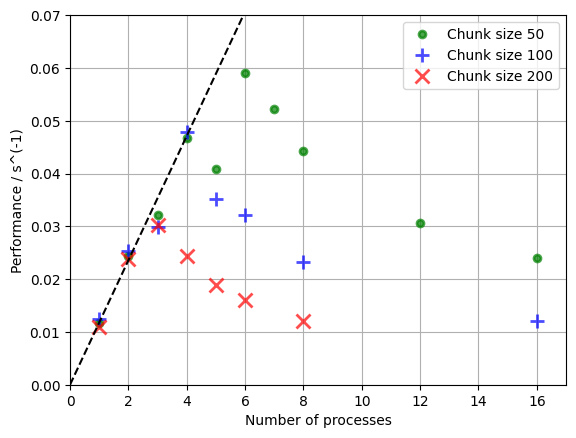

In [136]:
plt.plot(time_to_finish_50.keys(), [1/v for v in time_to_finish_50.values()], 'g.', alpha=0.7, ms=10, mew=2, label='Chunk size 50')
plt.plot(time_to_finish_100.keys(), [1/v for v in time_to_finish_100.values()], 'b+', alpha=0.7, ms=10, mew=2, label='Chunk size 100')
plt.plot(time_to_finish_200.keys(), [1/v for v in time_to_finish_200.values()], 'rx', alpha=0.7, ms=10, mew=2, label='Chunk size 200')
plt.plot([0,8], [0,8/time_to_finish_50[1]], 'k--')
plt.xlabel('Number of processes')
plt.ylabel('Performance / s^(-1)')
plt.xlim(0,17)
plt.ylim(0,0.07)
plt.grid()
plt.legend()

In [6]:
df_full = bioframe.read_table('hg38_genes_filtered_promoters_fixed.bed', schema='bed')
df_full['name'] = df_full['name'].apply(lambda x: x.split('.')[0])
df_full.drop(columns=['score', 'strand'], inplace=True)
df_full.set_index('name', inplace=True)

In [7]:
(len(df_full) / 16) ** 0.5

85.3847908002356

In [8]:
df_full[df_full['chrom'] == 'chr1']

,chrom,start,end
name,,,
ENST00000456328,chr1,11118,12118
ENST00000450305,chr1,11259,12259
ENST00000488147,chr1,29320,30320
ENST00000619216,chr1,17186,18186
ENST00000473358,chr1,28803,29803
...,...,...,...
ENST00000417047,chr1,248858413,248859413
ENST00000355360,chr1,248905445,248906445
ENST00000329291,chr1,248905484,248906484


In [9]:
chr_list = ['chr{}'.format(i) for i in [j for j in range(1,23)] + ['M', 'X', 'Y']]

In [10]:
from math import *

In [19]:
start_time = time.time()

n_processes = 16

chr_list = ['chr{}'.format(i) for i in [j for j in range(1,23)] + ['M', 'X', 'Y']]

results_list = []

for chrom in chr_list:
    print (chrom)

    df_chrom = df_full[df_full['chrom'] == chrom]

    print (len(df_chrom))
    chunk_size = ceil(sqrt(len(df_chrom) / n_processes))

    chunk_divisions = [i for i in range(0,len(df_chrom),chunk_size)]

    p = Pool(n_processes)

    def temp_func(x):
        return filter_edges(bb_file, df_chrom, chrom, x, x+chunk_size)

    time.sleep(0.5)

    result = p.map_async(temp_func, chunk_divisions, chunksize=n_processes)
    edges_chrom_list = result.get()

    results_list += edges_chrom_list

elapsed = time.time() - start_time
print ('Elapsed time: {:n} m {:.2f} s'.format(elapsed // 60, elapsed % 60))

chr1
10789
chr2
8175
chr3
6707
chr4
5075
chr5
5660
chr6
5853
chr7
5636
chr8
4709
chr9
4269
chr10
4575
chr11
6744
chr12
5939
chr13
2410
chr14
4272
chr15
4105
chr16
4838
chr17
6116
chr18
2239
chr19
6303
chr20
2858
chr21
1590
chr22
2527
chrM
37
chrX
4477
chrY
746
Elapsed time: 10 m 35.65 s


In [20]:
df_all_edges = pd.concat(results_list, ignore_index=True)

In [21]:
df_all_edges.to_csv('tf_transcript_edges.tsv', sep='\t', index=False)

In [22]:
df_all_edges = pd.read_csv('tf_transcript_edges.tsv', sep='\t')

In [23]:
df_all_edges
# 16482951

,TFName,score,name,transcript
0,ASCL1,458,MA1631.1,ENST00000456328
1,ATOH7,471,MA1468.1,ENST00000456328
2,Ascl2,424,MA0816.1,ENST00000456328
3,BCL6,454,MA0463.2,ENST00000456328
4,BHLHA15,407,MA0607.2,ENST00000456328
...,...,...,...,...
16482946,ZNF692,465,MA1986.1,ENST00000507418
16482947,ZNF708,482,MA1730.1,ENST00000507418
16482948,Zfp335,483,MA2002.1,ENST00000507418
16482949,Zfx,512,MA0146.2,ENST00000507418


In [25]:
from sponge.sponge import Sponge

sponge_obj = Sponge()
sponge_obj.select_tfs()
sponge_obj.find_human_homologs()

tf_names_list = [i.name for i in sponge_obj.motifs if i.matrix_id in sponge_obj.matrix_ids] 
tf_humanised_names_list = [i if i not in sponge_obj.animal_to_human else sponge_obj.animal_to_human[i] for i in tf_names_list]

Using: JASPAR2022
All motif versions: 1205
Motif base IDs: 841
Unique motifs: 791
Motifs without heterodimers: 723
Non-human motifs: 103
Names missing from the homologene database:
Znf423 ['O08961']
mix-a ['P21711']
Dux ['A1JVI8']
Retrieving results from UniProt...
Retrying in 3s
Retrying in 3s
Retrying in 3s
Fetched: 3 / 3
Duplicate names:
   Original Name Adjusted Name  Group ID Human Name  Trivial
31         Nr2f6         Nr2f6    7706.0      NR2F6     True
37         Nr2F6         Nr2f6    7706.0      NR2F6     True
66         Ptf1a         Ptf1a   10304.0      PTF1A     True
67         Ptf1A         Ptf1a   10304.0      PTF1A     True
Final number of IDs which will be replaced by human homologs: 87
Final number of total matrix IDs: 707


In [26]:
df_all_edges['TFName'] = df_all_edges['TFName'].apply(lambda x: sponge_obj.animal_to_human[x] if x in sponge_obj.animal_to_human else x)

In [27]:
annotations = pd.read_csv('gencode_annotations_filtered.tsv', sep='\t')

In [28]:
annotations.head()

,Gene stable ID,Transcript stable ID,GENCODE basic annotation,Transcript support level (TSL),Ensembl Canonical,Gene name,Gene type
0,ENSG00000160072,ENST00000673477,GENCODE basic,NaN,1.0,ATAD3B,protein_coding
1,ENSG00000160072,ENST00000308647,GENCODE basic,tsl1 (assigned to previous version 7),NaN,ATAD3B,protein_coding
2,ENSG00000279928,ENST00000624431,GENCODE basic,tslNA,1.0,DDX11L17,unprocessed_pseudogene
3,ENSG00000228037,ENST00000424215,GENCODE basic,tsl5,1.0,NaN,lncRNA
4,ENSG00000142611,ENST00000511072,GENCODE basic,tsl5,NaN,PRDM16,protein_coding


In [29]:
annotations.drop(columns=['GENCODE basic annotation', 'Transcript support level (TSL)', 'Ensembl Canonical'], inplace=True)

In [30]:
annotations['Transcript stable ID'].value_counts()

ENST00000673477    1
ENST00000495472    1
ENST00000231948    1
ENST00000639284    1
ENST00000625495    1
                  ..
ENST00000219821    1
ENST00000542583    1
ENST00000381414    1
ENST00000541464    1
ENST00000700901    1
Name: Transcript stable ID, Length: 117592, dtype: int64

In [31]:
full_frame = df_all_edges.join(other=annotations.set_index('Transcript stable ID'), on='transcript')

In [32]:
full_frame

,TFName,score,name,transcript,Gene stable ID,Gene name,Gene type
0,ASCL1,458,MA1631.1,ENST00000456328,ENSG00000290825,DDX11L2,lncRNA
1,ATOH7,471,MA1468.1,ENST00000456328,ENSG00000290825,DDX11L2,lncRNA
2,ASCL2,424,MA0816.1,ENST00000456328,ENSG00000290825,DDX11L2,lncRNA
3,BCL6,454,MA0463.2,ENST00000456328,ENSG00000290825,DDX11L2,lncRNA
4,BHLHA15,407,MA0607.2,ENST00000456328,ENSG00000290825,DDX11L2,lncRNA
...,...,...,...,...,...,...,...
16482946,ZNF692,465,MA1986.1,ENST00000507418,ENSG00000227159,DDX11L16,unprocessed_pseudogene
16482947,ZNF708,482,MA1730.1,ENST00000507418,ENSG00000227159,DDX11L16,unprocessed_pseudogene
16482948,ZNF335,483,MA2002.1,ENST00000507418,ENSG00000227159,DDX11L16,unprocessed_pseudogene
16482949,ZFX,512,MA0146.2,ENST00000507418,ENSG00000227159,DDX11L16,unprocessed_pseudogene


In [33]:
full_frame.isna().sum()

TFName                  0
score                   0
name                    0
transcript              0
Gene stable ID      74010
Gene name         3470779
Gene type           74010
dtype: int64

In [34]:
full_frame[full_frame['Gene stable ID'].isna()]['transcript'].unique()[:10]

array(['ENST00000431321', 'ENST00000692781', 'ENST00000692936',
       'ENST00000589964', 'ENST00000403496', 'ENST00000689509',
       'ENST00000687023', 'ENST00000702677', 'ENST00000689308',
       'ENST00000649325'], dtype=object)

In [35]:
full_frame.dropna(subset='Gene stable ID', inplace=True)

In [36]:
full_frame.isna().sum()

TFName                  0
score                   0
name                    0
transcript              0
Gene stable ID          0
Gene name         3396769
Gene type               0
dtype: int64

In [37]:
full_frame.sort_values('score', ascending=False, inplace=True)

In [38]:
full_frame_2 = full_frame.drop_duplicates(subset=['TFName', 'Gene stable ID']).copy()

In [39]:
full_frame_2

,TFName,score,name,transcript,Gene stable ID,Gene name,Gene type
4546422,CTCF,1000,MA1930.1,ENST00000701025,ENSG00000287709,NaN,lncRNA
11289872,EWSR1-FLI1,1000,MA0149.1,ENST00000554173,ENSG00000140093,SERPINA10,protein_coding
14719800,ZNF140,1000,MA1589.1,ENST00000593427,ENSG00000268205,NaN,lncRNA
6459328,EWSR1-FLI1,1000,MA0149.1,ENST00000689825,ENSG00000286923,NaN,lncRNA
9144284,ZNF16,1000,MA1654.1,ENST00000384297,ENSG00000207024,Y_RNA,misc_RNA
...,...,...,...,...,...,...,...
13822437,ELF1,400,MA0473.3,ENST00000649298,ENSG00000267134,LINC01924,lncRNA
6764639,BACH1,400,MA1633.2,ENST00000449315,ENSG00000233489,PAXBP1P1,processed_pseudogene
16242297,NEUROG1,400,MA0623.2,ENST00000441066,ENSG00000230973,NaN,processed_pseudogene
5175974,NFKB2,400,MA0778.1,ENST00000380106,ENSG00000205444,KU-MEL-3,lncRNA


In [40]:
full_frame_2['Gene name'] = full_frame_2['Gene name'].fillna(full_frame_2['Gene stable ID'])

In [41]:
full_frame_2['TFName'].nunique()

672

In [42]:
full_frame_2['Gene stable ID'].nunique()

62466

In [43]:
full_frame_2['edge'] = 1

In [44]:
full_frame_2.sort_values(by=['TFName', 'Gene stable ID']).to_csv(
    'tf_prior_2.tsv', sep='\t', columns=['TFName', 'Gene stable ID', 'edge'], 
    header=False, index=False
)

In [64]:
old_version = pd.read_csv('tf_prior.tsv', sep='\t', header=None)

In [65]:
new_version = pd.read_csv('tf_prior_2.tsv', sep='\t', header=None)

In [71]:
old_version[0].nunique()

672

In [72]:
new_version[0].nunique()

672

In [73]:
old_tfs = set(old_version[0].unique())

In [74]:
new_tfs = set(new_version[0].unique())

In [75]:
old_tfs - new_tfs

set()

In [76]:
new_tfs - old_tfs

set()

In [77]:
len(tf_names_list)

707

In [83]:
ov2 = old_version.rename(columns={0: 'tf',  1: 'gene',  2: 'edge'}).set_index(['tf', 'gene'])

In [84]:
nv2 = new_version.rename(columns={0: 'tf',  1: 'gene',  2: 'edge'}).set_index(['tf', 'gene'])

In [86]:
comparison = ov2.join(nv2, rsuffix='_new', lsuffix='_old', how='outer')

In [88]:
comparison.isna().sum()

edge_old    159261
edge_new         0
dtype: int64

In [52]:
name_id_matching = full_frame_2.groupby(['Gene name', 'Gene stable ID'])['Gene name'].count()

In [53]:
id_to_name = {i[1]: i[0] for i in name_id_matching.groupby(level=0).idxmax().values}

In [54]:
name_frame = full_frame_2.copy()

In [55]:
name_frame['Gene name'] = name_frame['Gene stable ID'].apply(
    lambda x: id_to_name[x] if x in id_to_name else np.nan)

In [56]:
name_frame.dropna(subset='Gene name', inplace=True)

In [57]:
name_frame

,TFName,score,name,transcript,Gene stable ID,Gene name,Gene type
4546422,CTCF,1000,MA1930.1,ENST00000701025,ENSG00000287709,ENSG00000287709,lncRNA
11289872,EWSR1-FLI1,1000,MA0149.1,ENST00000554173,ENSG00000140093,SERPINA10,protein_coding
14719800,ZNF140,1000,MA1589.1,ENST00000593427,ENSG00000268205,ENSG00000268205,lncRNA
6459328,EWSR1-FLI1,1000,MA0149.1,ENST00000689825,ENSG00000286923,ENSG00000286923,lncRNA
15566481,EWSR1-FLI1,1000,MA0149.1,ENST00000383888,ENSG00000206615,RNU6-338P,snRNA
...,...,...,...,...,...,...,...
13822437,ELF1,400,MA0473.3,ENST00000649298,ENSG00000267134,LINC01924,lncRNA
6764639,BACH1,400,MA1633.2,ENST00000449315,ENSG00000233489,PAXBP1P1,processed_pseudogene
16242297,NEUROG1,400,MA0623.2,ENST00000441066,ENSG00000230973,ENSG00000230973,processed_pseudogene
5175974,NFKB2,400,MA0778.1,ENST00000380106,ENSG00000205444,KU-MEL-3,lncRNA


In [58]:
name_frame['Edge'] = 1

In [60]:
name_frame.sort_values(by=['TFName', 'Gene name'], inplace=True)

In [62]:
name_frame.to_csv('tf_prior_names_fixed.tsv', columns=['TFName', 'Gene name', 'Edge'], 
                  sep='\t', header=None, index=False)

In [66]:
ppi_df = pd.read_csv('ppi_prior.tsv', sep='\t', header=None)

In [71]:
ppi_tfs = set(ppi_df[0].unique()).union(set(ppi_df[1].unique()))

In [72]:
len(ppi_tfs)

631

In [73]:
present_tfs = name_frame['TFName'].unique()

In [75]:
len(present_tfs)

672

In [76]:
str_network = pd.read_csv('string_interactions_short.tsv', sep='\t')

In [77]:
str_rename = {'SOX4': 'SRY', 'T': 'TBXT', 'HGNC:9982': 'RFX1'}

In [78]:
str_network['#node1'].replace(str_rename, inplace=True)

In [79]:
str_network['node2'].replace(str_rename, inplace=True)

In [80]:
str_network_2 = str_network[str_network['#node1'].isin(present_tfs) & str_network['node2'].isin(present_tfs)].copy()

In [81]:
str_network_2['edge'] = 1

In [82]:
new_ppi_tfs = set(str_network_2['#node1'].unique()).union(set(str_network_2['node2'].unique()))

In [83]:
len(new_ppi_tfs)

631

In [84]:
ppi_tfs - new_ppi_tfs

set()

In [85]:
# str_network_2.sort_values(['#node1', 'node2']).to_csv('ppi_prior_fixed.tsv', columns=['#node1', 'node2', 'edge'], sep='\t', header=None, index=False)